In [1]:
# !pip install easyocr==1.7.1

In [2]:
import easyocr

In [4]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [5]:
def plot_bounding_boxes(image: np.ndarray,
                        bounding_boxes: np.ndarray,
                        confidences: np.ndarray):

    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    for xyxy, conf in zip(bounding_boxes, confidences):
        label = f'face {conf:.2f}'
        color = (0, 0, 255)
        plot_one_box(xyxy, image, color, label, steps=3, orig_shape=image.shape[:2])

    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [6]:
def visualize_recognition_result(image_path: str, result: list) -> None:
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = np.pad(image, [[30, 30], [0, 0], [0, 0]], 'constant', constant_values=255)
    
    color = (0, 255, 0)
    for r in result:
        bbox = r[0]
        c1, c2 = (int(bbox[0][0]), 30 + int(bbox[0][1])), (int(bbox[2][0]), 30 + int(bbox[2][1]))
        cv2.rectangle(image, c1, c2, color, 2, cv2.LINE_AA)
        if c1[1] < image.shape[0] // 3:
            cv2.putText(image, r[1], (c1[0], c1[1]), 1, 2, [0, 0, 0], thickness=2, lineType=cv2.LINE_AA)
        else:
            cv2.putText(image, r[1], (c1[0], c2[1] + 20), 1, 2, [0, 0, 0], thickness=2, lineType=cv2.LINE_AA)
    
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [7]:
reader = easyocr.Reader(['en'], detector=False)
singleline_result = reader.recognize('sample_singleline_text_image.png')
singleline_result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [215, 0], [215, 48], [0, 48]],
  'Thank you! ! !',
  0.40731997693654115)]

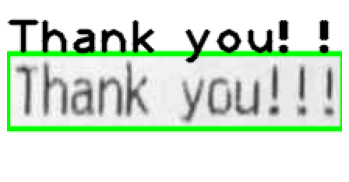

In [8]:
visualize_recognition_result('sample_singleline_text_image.png', singleline_result)

In [9]:
reader = easyocr.Reader(['en'], detect_network='craft')
multiline_result = reader.readtext('sample_multiline_text_image.png')
multiline_result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[78, 4], [178, 4], [178, 52], [78, 52]], 'Thank', 0.9959094999682021),
 ([[257, 11], [297, 11], [297, 49], [257, 49]], '4', 0.2837502418200053),
 ([[4, 50], [350, 50], [350, 100], [4, 100]],
  'Please Coie Again! !',
  0.4827676341167234),
 ([[180.37004658340297, 11.273135091868639],
   [261.2231989061432, 5.323324636951492],
   [262.629953416597, 49.72686490813136],
   [181.7768010938568, 55.67667536304851]],
  'youl!',
  0.4611277875914474)]

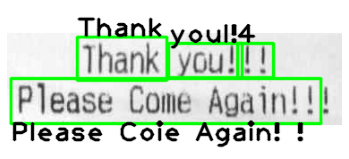

In [10]:
visualize_recognition_result('sample_multiline_text_image.png', multiline_result)